In [2]:
import json
import pandas as pd


## Import dataset 

In [3]:
data = pd.read_json('D:/Documents/IIT/3rd year/deep learning/cw p2/yelp dataset/yelp_academic_dataset_review.json', orient="records", lines= True, nrows=5000)


## Exploring Data

In [17]:
data.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


In [10]:
type(data)


pandas.core.frame.DataFrame

In [11]:
data.describe()

,stars,useful,funny,cool
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.854300,0.889100,0.246500,0.335500
std,1.346719,2.092329,0.885221,1.051023
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,0.000000,0.000000
75%,5.000000,1.000000,0.000000,0.000000
max,5.000000,91.000000,26.000000,44.000000


In [12]:
data.isnull().sum()

review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
dtype: int64

In [49]:
data.nunique()


review_id      5000
user_id        4843
business_id    2663
stars             5
useful           22
funny            14
cool             14
text           5000
date           4997
dtype: int64

In [48]:
data.duplicated().sum()

0

In [32]:
data.shape

(6990280, 9)

## Plots

In [51]:
import pandas 
import matplotlib 
import numpy 
import nltk 
import seaborn 
import sklearn
import gensim  
import wordcloud 
import textblob 
import spacy 
import textstat

c:\Users\Diren\.conda\envs\sentiment_ana\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<AxesSubplot:>

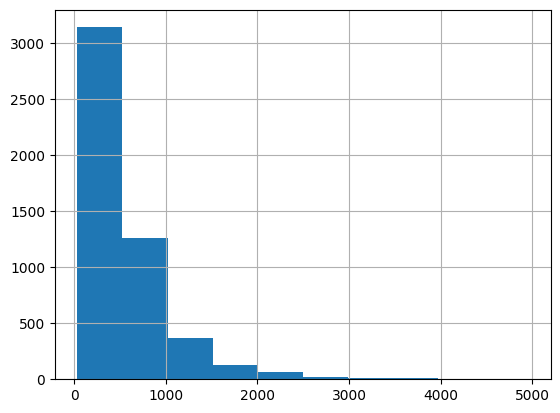

In [18]:
data['text'].str.len().hist()

<AxesSubplot:>

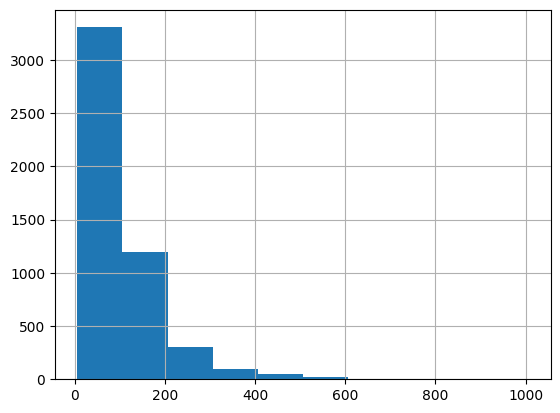

In [19]:
data['text'].str.split().map(lambda x: len(x)).hist()

## Remove reviews that are not in english

In [4]:
import langdetect
temp = []

for text in (data.loc[:,'text']):
    try:
        detected_lan = langdetect.detect(text)
        if detected_lan != "en":
            print(f"detected language {detected_lan}")
            data.drop(['text'], axis='rows',inplace=True)
    except:
        pass
        


detected language es
detected language ja
detected language af
detected language nl
detected language nl
detected language es


In [26]:
import langdetect
temp = []

for text in data.loc[:,'text']:
    try:
        detected_lan = langdetect.detect(data.loc[i,'text'])
        if detected_lan != "en":
            print(detected_lan)
            print(text)
    except Exception as e:
        print (e)
        pass


In [19]:
print(data.loc[:,'text'])

0          If you decide to eat here, just be aware it is...
1          I've taken a lot of spin classes over the year...
2          Family diner. Had the buffet. Eclectic assortm...
3          Wow!  Yummy, different,  delicious.   Our favo...
4          Cute interior and owner (?) gave us tour of up...
                                 ...                        
6990275    Latest addition to services from ICCU is Apple...
6990276    This spot offers a great, affordable east week...
6990277    This Home Depot won me over when I needed to g...
6990278    For when I'm feeling like ignoring my calorie-...
6990279    Located in the 'Walking District' in Nashville...
Name: text, Length: 6990280, dtype: object


In [14]:
print(data.loc[0,'text'])

If you decide to eat here, just be aware it is going to take about 2 hours from beginning to end. We have tried it multiple times, because I want to like it! I have been to it's other locations in NJ and never had a bad experience. 

The food is good, but it takes a very long time to come out. The waitstaff is very young, but usually pleasant. We have just had too many experiences where we spent way too long waiting. We usually opt for another diner or restaurant on the weekends, in order to be done quicker.


## Cleaning up grammar in all reviews

In [27]:
import contractions

In [43]:
bad_chars = ['#', '@','*','^','_','{','}','[',']',':',';','~','`','<','>','|','+','=','%','$']

In [45]:
for text in data.loc[:,'text']:
    temp = text
    #Remove bad characters
    for chars in bad_chars:
        temp = temp.replace(chars, '')
    #remove contractions
    temp = contractions.fix(temp)
    #lowercase all letters in data
    temp = temp.lower()
    data.replace(to_replace=text, value=temp, inplace=True)

In [46]:
print(data.loc[2,'text'])

family diner. had the buffet. eclectic assortment a large chicken leg, fried jalapeño, tamale, two rolled grape leaves, fresh melon. all good. lots of mexican choices there. also has a menu with breakfast served all day long. friendly, attentive staff. good place for a casual relaxed meal with no expectations. next to the clarion hotel.
